# How enough is 512 dimensions?

Let's say that the 512 embedding vectors are uniformly distributed over the sphere.


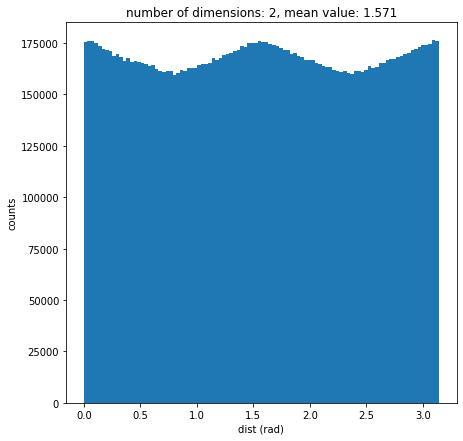

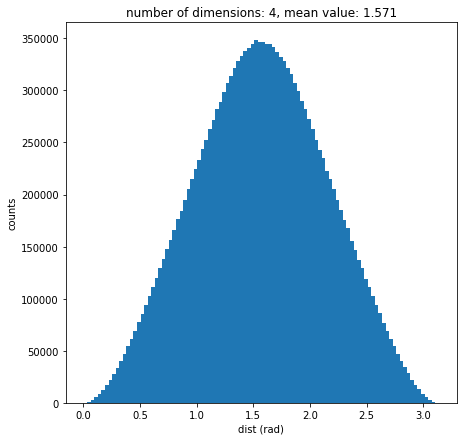

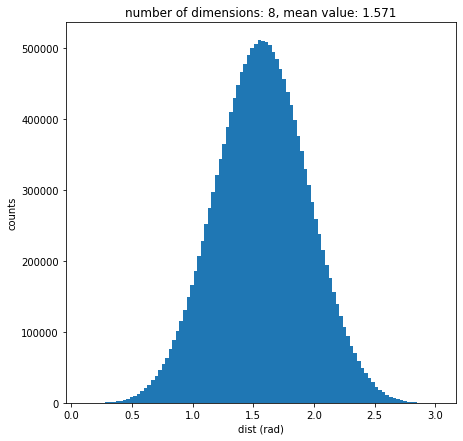

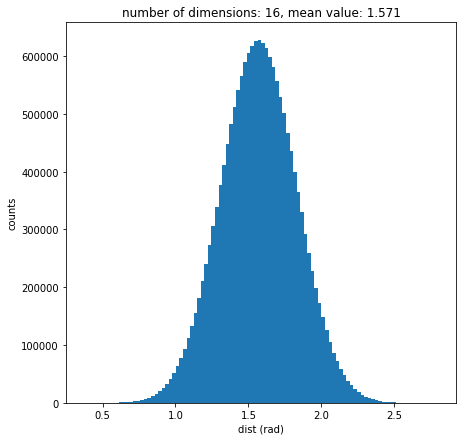

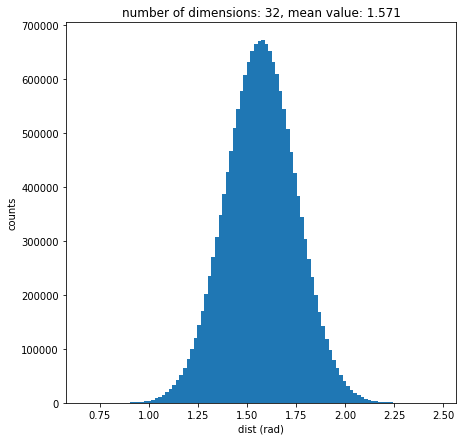

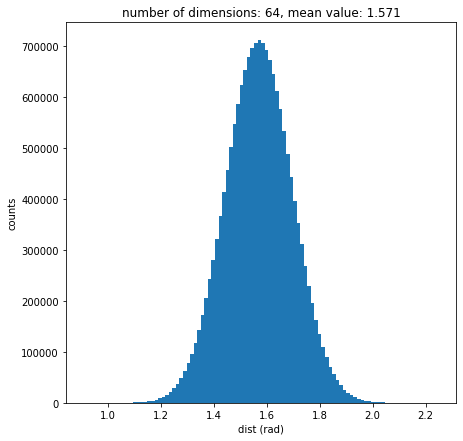

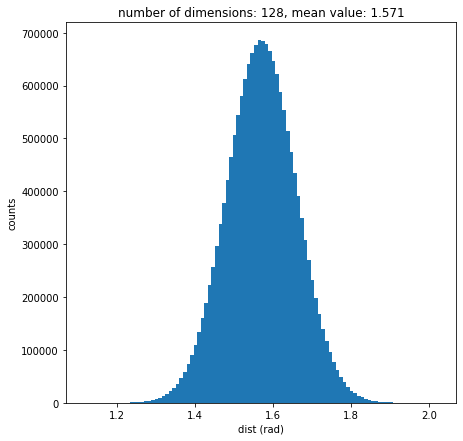

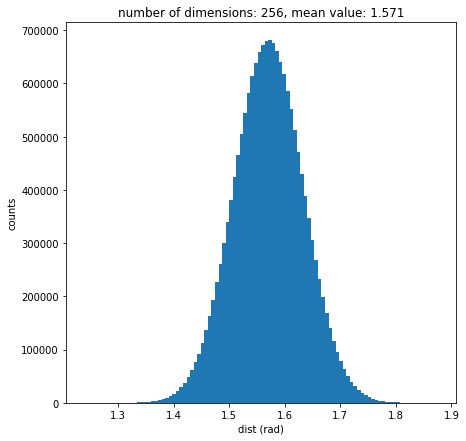

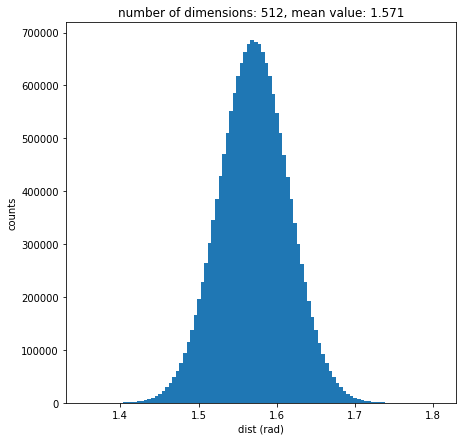

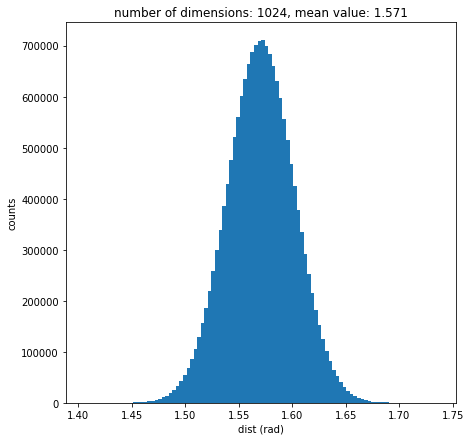

In [35]:
def calc_angle_distance(emb1, emb2):
    """Calculate the angle (radian) distance between the embeddings."""
    return np.arccos(np.clip((emb1 @ emb2.T), -1, 1))

import numpy as np
import matplotlib.pyplot as plt

NUM_DIMS = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
NUM_VECS = (2)**12

for dims in NUM_DIMS:
    embs = np.random.uniform(low=-1, high=1, size=(NUM_VECS, dims))
    embs = embs / np.linalg.norm(embs, axis=1)[..., np.newaxis]
    dist = calc_angle_distance(embs, embs)
    dist = dist[~np.eye(dist.shape[0],dtype=bool)].reshape(dist.shape[0],-1)

    plt.figure(figsize=(7,7))
    plt.hist(dist.flatten(), bins=100)
    plt.xlabel('dist (rad)')
    plt.ylabel('counts')
    plt.title(f"number of dimensions: {dims}, mean value: {dist.mean().round(3)}")
    plt.show()


In [36]:
NUM_DIMS = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
NUM_VECS = (2)**12

import json
import os

stats = {}
for dims in NUM_DIMS:
    embs = np.random.uniform(low=-1, high=1, size=(NUM_VECS, dims))
    embs = embs / np.linalg.norm(embs, axis=1)[..., np.newaxis]
    dist = calc_angle_distance(embs, embs)
    dist = dist[~np.eye(dist.shape[0],dtype=bool)].reshape(dist.shape[0],-1)
    dist = dist.flatten()

    stats_ = {}
    for DIST in np.arange(0, 2, 0.1):
        stats_[DIST.round(1)] = ((dist < DIST).sum() / len(dist)).round(4)

    stats[dims] = stats_
    
    with open(f'assess-dimensionality.json', 'w') as stream:
        json.dump(stats, stream)